In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/TripAdvisor_RestauarantRecommendation.csv')
print(df.columns)

Index(['Name', 'Street Address', 'Location', 'Type', 'Reviews',
       'No of Reviews', 'Comments', 'Contact Number', 'Trip_advisor Url',
       'Menu', 'Price_Range'],
      dtype='object')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ny_df = df[df['Location'].str.contains("NY")]




In [ ]:
ny_df_f=ny_df[['Name','Street Address','Location','Type','Reviews','No of Reviews']]

In [ ]:
ny_df_f.head()

,Name,Street Address,Location,Type,Reviews,No of Reviews
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews
9,John Thomas Steakhouse,1152 Danby Rd,"Ithaca, NY 14850-8927","American, Steakhouse, Gluten Free Options",4 of 5 bubbles,258 reviews
10,ZaZa's Cucina,622 Cascadilla St,"Ithaca, NY 14850-4049","Italian, Vegetarian Friendly, Gluten Free Opt...",4 of 5 bubbles,271 reviews
13,New World Bistro Bar,300 Delaware Ave,"Albany, NY 12209-1627","American, Bar, Vegetarian Friendly",4.5 of 5 bubbles,706 reviews


In [ ]:
ny_df_f['Extracted Rating'] = ny_df_f['Reviews'].str.split(' ').str[0]

<ipython-input-5-7b033f2c580a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_df_f['Extracted Rating'] = ny_df_f['Reviews'].str.split(' ').str[0]


In [ ]:
ny_df_f=ny_df_f.drop('Reviews',axis=1)

In [ ]:
ny_df_f.head()

,Name,Street Address,Location,Type,No of Reviews,Extracted Rating
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",256 reviews,4
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",285 reviews,4
9,John Thomas Steakhouse,1152 Danby Rd,"Ithaca, NY 14850-8927","American, Steakhouse, Gluten Free Options",258 reviews,4
10,ZaZa's Cucina,622 Cascadilla St,"Ithaca, NY 14850-4049","Italian, Vegetarian Friendly, Gluten Free Opt...",271 reviews,4
13,New World Bistro Bar,300 Delaware Ave,"Albany, NY 12209-1627","American, Bar, Vegetarian Friendly",706 reviews,4.5


In [ ]:
ny_df_f['Number of Reviews'] = ny_df_f['No of Reviews'].str.split(' ').str[0]

In [ ]:
ny_df_f.head()

,Name,Street Address,Location,Type,No of Reviews,Extracted Rating,Number of Reviews
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",256 reviews,4,256
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",285 reviews,4,285
9,John Thomas Steakhouse,1152 Danby Rd,"Ithaca, NY 14850-8927","American, Steakhouse, Gluten Free Options",258 reviews,4,258
10,ZaZa's Cucina,622 Cascadilla St,"Ithaca, NY 14850-4049","Italian, Vegetarian Friendly, Gluten Free Opt...",271 reviews,4,271
13,New World Bistro Bar,300 Delaware Ave,"Albany, NY 12209-1627","American, Bar, Vegetarian Friendly",706 reviews,4.5,706


In [ ]:
ny_df_f=ny_df_f.drop('No of Reviews',axis=1)

In [ ]:
ny_df_f['Extracted Rating']=ny_df_f['Extracted Rating'].astype('float')


In [ ]:
ny_df_f['Number of Reviews'] = ny_df_f['Number of Reviews'].str.replace(',', '')


In [ ]:
ny_df_f['Number of Reviews']=ny_df_f['Number of Reviews'].astype('float')

In [ ]:
rating_weight = 0.8
review_weight = 0.2

# Calculate the overall rating for each restaurant
ny_df_f['Overall Rating'] = (ny_df_f['Extracted Rating'] * rating_weight) + (ny_df_f['Number of Reviews'] * review_weight)

# Round the values to two decimal places
ny_df_f['Overall Rating'] = round(ny_df_f['Overall Rating'], 2)

In [ ]:
ny_df_f.head()

,Name,Street Address,Location,Type,Extracted Rating,Number of Reviews,Overall Rating
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4.0,256.0,54.4
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4.0,285.0,60.2
9,John Thomas Steakhouse,1152 Danby Rd,"Ithaca, NY 14850-8927","American, Steakhouse, Gluten Free Options",4.0,258.0,54.8
10,ZaZa's Cucina,622 Cascadilla St,"Ithaca, NY 14850-4049","Italian, Vegetarian Friendly, Gluten Free Opt...",4.0,271.0,57.4
13,New World Bistro Bar,300 Delaware Ave,"Albany, NY 12209-1627","American, Bar, Vegetarian Friendly",4.5,706.0,144.8


In [ ]:
ny_df_f.isna().sum()

Name                 0
Street Address       0
Location             0
Type                 1
Extracted Rating     0
Number of Reviews    0
Overall Rating       0
dtype: int64

In [ ]:
ny_df_f['Zip Code'] = ny_df_f['Location'].str.extract(r'(\b\d{5})')

In [ ]:
ny_df_f.head()

,Name,Street Address,Location,Type,Extracted Rating,Number of Reviews,Overall Rating,Zip Code
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4.0,256.0,54.4,12601
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4.0,285.0,60.2,13212
9,John Thomas Steakhouse,1152 Danby Rd,"Ithaca, NY 14850-8927","American, Steakhouse, Gluten Free Options",4.0,258.0,54.8,14850
10,ZaZa's Cucina,622 Cascadilla St,"Ithaca, NY 14850-4049","Italian, Vegetarian Friendly, Gluten Free Opt...",4.0,271.0,57.4,14850
13,New World Bistro Bar,300 Delaware Ave,"Albany, NY 12209-1627","American, Bar, Vegetarian Friendly",4.5,706.0,144.8,12209


In [ ]:

df2 = pd.read_csv('/content/drive/MyDrive/New_York_State_ZIP_Codes-County_FIPS_Cross-Reference.csv')

In [ ]:
df2.head()

,County Name,State FIPS,County Code,County FIPS,ZIP Code,File Date
0,Albany,36,1,36001,12007,07/25/2007
1,Albany,36,1,36001,12009,07/25/2007
2,Albany,36,1,36001,12023,07/25/2007
3,Albany,36,1,36001,12041,07/25/2007
4,Albany,36,1,36001,12045,07/25/2007


In [ ]:
df2=df2[['County Name','ZIP Code']]

In [ ]:
ny_df_f['Zip Code']=ny_df_f['Zip Code'].astype('str')

In [ ]:
df2['ZIP Code']=df2['ZIP Code'].astype('str')

In [ ]:
df3 = pd.merge(ny_df_f, df2[['ZIP Code', 'County Name']], left_on='Zip Code',right_on='ZIP Code')

In [ ]:
df3.head()

,Name,Street Address,Location,Type,Extracted Rating,Number of Reviews,Overall Rating,Zip Code,ZIP Code,County Name
0,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4.0,256.0,54.4,12601,12601,Dutchess
1,River Station Restaurant,1 North Water Street,"Poughkeepsie, NY 12601","American, Bar, Seafood",3.5,239.0,50.6,12601,12601,Dutchess
2,Texas Roadhouse Restaurant,2323 South Rd,"Poughkeepsie, NY 12601-5584","American, Steakhouse",4.0,104.0,24.0,12601,12601,Dutchess
3,Lolita's Pizza,129 Washington St,"Poughkeepsie, NY 12601-1813","Italian, Pizza, Vegetarian Friendly",4.5,30.0,9.6,12601,12601,Dutchess
4,A Touch of Naples Pizza & Pasta,389 Violet Ave,"Poughkeepsie, NY 12601-1054","Italian, Pizza",5.0,22.0,8.4,12601,12601,Dutchess


In [ ]:
df3=df3.drop('ZIP Code',axis=1)

In [ ]:
df3=df3.drop('Number of Reviews',axis=1)

In [ ]:
df3.head()

,Name,Street Address,Location,Type,Extracted Rating,Overall Rating,Zip Code,County Name
0,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4.0,54.4,12601,Dutchess
1,River Station Restaurant,1 North Water Street,"Poughkeepsie, NY 12601","American, Bar, Seafood",3.5,50.6,12601,Dutchess
2,Texas Roadhouse Restaurant,2323 South Rd,"Poughkeepsie, NY 12601-5584","American, Steakhouse",4.0,24.0,12601,Dutchess
3,Lolita's Pizza,129 Washington St,"Poughkeepsie, NY 12601-1813","Italian, Pizza, Vegetarian Friendly",4.5,9.6,12601,Dutchess
4,A Touch of Naples Pizza & Pasta,389 Violet Ave,"Poughkeepsie, NY 12601-1054","Italian, Pizza",5.0,8.4,12601,Dutchess


In [ ]:
eco_df = pd.read_csv('/content/drive/MyDrive/acs2017_county_data.csv')

In [ ]:
eco_df.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [ ]:
eco_df=eco_df[['State','County','TotalPop','Hispanic','White', 'Black', 'Native', 'Asian', 'Pacific','Income','IncomePerCap','Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment']]

In [ ]:
eco_df.head()

,State,County,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga County,55036,2.7,75.4,18.9,0.3,0.9,0.0,55317,27824,24112,74.1,20.2,5.6,0.1,5.2
1,Alabama,Baldwin County,203360,4.4,83.1,9.5,0.8,0.7,0.0,52562,29364,89527,80.7,12.9,6.3,0.1,5.5
2,Alabama,Barbour County,26201,4.2,45.7,47.8,0.2,0.6,0.0,33368,17561,8878,74.1,19.1,6.5,0.3,12.4
3,Alabama,Bibb County,22580,2.4,74.6,22.0,0.4,0.0,0.0,43404,20911,8171,76.0,17.4,6.3,0.3,8.2
4,Alabama,Blount County,57667,9.0,87.4,1.5,0.3,0.1,0.0,47412,22021,21380,83.9,11.9,4.0,0.1,4.9


In [ ]:
eco_df = eco_df[eco_df['State'].str.contains("New York")]

In [ ]:
eco_df.head()

,State,County,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1828,New York,Albany County,308580,5.7,73.0,11.7,0.1,6.4,0.0,62293,35278,158961,71.3,24.5,4.2,0.1,5.3
1829,New York,Allegany County,47400,1.5,94.5,1.4,0.3,1.2,0.0,45359,22377,20132,73.6,19.3,6.8,0.3,7.3
1830,New York,Bronx County,1455846,55.7,9.5,29.4,0.2,3.6,0.0,36593,19721,593858,80.0,14.6,5.3,0.1,11.6
1831,New York,Broome County,196124,4.0,84.0,5.1,0.2,4.2,0.0,49064,26790,87365,75.3,19.8,4.9,0.0,7.2
1832,New York,Cattaraugus County,78175,2.0,90.8,1.6,2.9,0.9,0.0,45571,23984,33732,73.4,20.0,6.3,0.2,7.0


In [ ]:
eco_df['County'] = eco_df['County'].str.split().str[0]

In [ ]:
merged_df = pd.merge(df3, eco_df, left_on='County Name',right_on='County')

In [ ]:
merged_df.head()

,Name,Street Address,Location,Type,Extracted Rating,Overall Rating,Zip Code,County Name,State,County,...,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4.0,54.4,12601,Dutchess,New York,Dutchess,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
1,River Station Restaurant,1 North Water Street,"Poughkeepsie, NY 12601","American, Bar, Seafood",3.5,50.6,12601,Dutchess,New York,Dutchess,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
2,Texas Roadhouse Restaurant,2323 South Rd,"Poughkeepsie, NY 12601-5584","American, Steakhouse",4.0,24.0,12601,Dutchess,New York,Dutchess,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
3,Lolita's Pizza,129 Washington St,"Poughkeepsie, NY 12601-1813","Italian, Pizza, Vegetarian Friendly",4.5,9.6,12601,Dutchess,New York,Dutchess,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
4,A Touch of Naples Pizza & Pasta,389 Violet Ave,"Poughkeepsie, NY 12601-1054","Italian, Pizza",5.0,8.4,12601,Dutchess,New York,Dutchess,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7


In [ ]:
merged_df.columns

Index(['Name', 'Street Address', 'Location', 'Type', 'Extracted Rating',
       'Overall Rating', 'Zip Code', 'County Name', 'State', 'County',
       'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'Income', 'IncomePerCap', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [ ]:
merged_df.isnull().sum()

Name                0
Street Address      0
Location            0
Type                1
Extracted Rating    0
Overall Rating      0
Zip Code            0
County Name         0
State               0
County              0
TotalPop            0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
Income              0
IncomePerCap        0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [ ]:
merged_df = merged_df.dropna(subset=['Type'])

In [ ]:
merged_df['Name'].nunique()

457

In [ ]:
merged_df.count()

Name                518
Street Address      518
Location            518
Type                518
Extracted Rating    518
Overall Rating      518
Zip Code            518
County Name         518
State               518
County              518
TotalPop            518
Hispanic            518
White               518
Black               518
Native              518
Asian               518
Pacific             518
Income              518
IncomePerCap        518
Employed            518
PrivateWork         518
PublicWork          518
SelfEmployed        518
FamilyWork          518
Unemployment        518
dtype: int64

In [ ]:
merged_df = merged_df.drop_duplicates(subset=['Name'])

In [ ]:
merged_df.head()

,Name,Street Address,Location,Type,Extracted Rating,Overall Rating,Zip Code,County Name,State,County,...,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4.0,54.4,12601,Dutchess,New York,Dutchess,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
1,River Station Restaurant,1 North Water Street,"Poughkeepsie, NY 12601","American, Bar, Seafood",3.5,50.6,12601,Dutchess,New York,Dutchess,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
2,Texas Roadhouse Restaurant,2323 South Rd,"Poughkeepsie, NY 12601-5584","American, Steakhouse",4.0,24.0,12601,Dutchess,New York,Dutchess,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
3,Lolita's Pizza,129 Washington St,"Poughkeepsie, NY 12601-1813","Italian, Pizza, Vegetarian Friendly",4.5,9.6,12601,Dutchess,New York,Dutchess,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
4,A Touch of Naples Pizza & Pasta,389 Violet Ave,"Poughkeepsie, NY 12601-1054","Italian, Pizza",5.0,8.4,12601,Dutchess,New York,Dutchess,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7


In [ ]:
merged_df.to_csv('Train_data.csv', sep='\t')

In [ ]:
merged_df=merged_df.drop('County Name',axis=1)

In [ ]:
merged_df.head()

,Name,Street Address,Location,Type,Extracted Rating,Overall Rating,Zip Code,State,County,TotalPop,...,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4.0,54.4,12601,New York,Dutchess,295685,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
1,River Station Restaurant,1 North Water Street,"Poughkeepsie, NY 12601","American, Bar, Seafood",3.5,50.6,12601,New York,Dutchess,295685,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
2,Texas Roadhouse Restaurant,2323 South Rd,"Poughkeepsie, NY 12601-5584","American, Steakhouse",4.0,24.0,12601,New York,Dutchess,295685,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
3,Lolita's Pizza,129 Washington St,"Poughkeepsie, NY 12601-1813","Italian, Pizza, Vegetarian Friendly",4.5,9.6,12601,New York,Dutchess,295685,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
4,A Touch of Naples Pizza & Pasta,389 Violet Ave,"Poughkeepsie, NY 12601-1054","Italian, Pizza",5.0,8.4,12601,New York,Dutchess,295685,...,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7


In [ ]:
merged_df.to_csv('train_data.csv', sep='\t')

<Axes: >

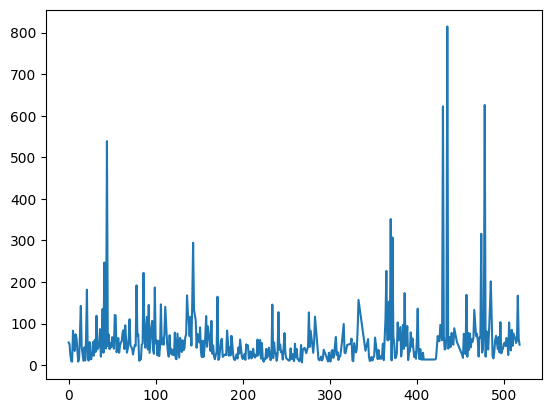

In [ ]:
merged_df['Overall Rating'].plot()

In [ ]:
merged_df['city']=merged_df['Location'].str.split(',').str[0]

In [ ]:
merged_df.head()

,Name,Street Address,Location,Type,Extracted Rating,Overall Rating,Zip Code,State,County,TotalPop,...,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,city
0,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4.0,54.4,12601,New York,Dutchess,295685,...,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7,Poughkeepsie
1,River Station Restaurant,1 North Water Street,"Poughkeepsie, NY 12601","American, Bar, Seafood",3.5,50.6,12601,New York,Dutchess,295685,...,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7,Poughkeepsie
2,Texas Roadhouse Restaurant,2323 South Rd,"Poughkeepsie, NY 12601-5584","American, Steakhouse",4.0,24.0,12601,New York,Dutchess,295685,...,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7,Poughkeepsie
3,Lolita's Pizza,129 Washington St,"Poughkeepsie, NY 12601-1813","Italian, Pizza, Vegetarian Friendly",4.5,9.6,12601,New York,Dutchess,295685,...,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7,Poughkeepsie
4,A Touch of Naples Pizza & Pasta,389 Violet Ave,"Poughkeepsie, NY 12601-1054","Italian, Pizza",5.0,8.4,12601,New York,Dutchess,295685,...,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7,Poughkeepsie


In [ ]:
merged_df=merged_df.drop('Street Address',axis=1)

In [ ]:
merged_df=merged_df.drop('Location',axis=1)

In [ ]:
merged_df=merged_df.drop('Extracted Rating',axis=1)

In [ ]:
merged_df=merged_df.drop('State',axis=1)

In [ ]:
merged_df=merged_df.drop('County',axis=1)

In [ ]:
merged_df=merged_df.drop('city',axis=1)

In [ ]:
merged_df.head()

,Name,Type,Overall Rating,Zip Code,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Table Talk Diner,"American, Diner, Vegetarian Friendly",54.4,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
1,River Station Restaurant,"American, Bar, Seafood",50.6,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
2,Texas Roadhouse Restaurant,"American, Steakhouse",24.0,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
3,Lolita's Pizza,"Italian, Pizza, Vegetarian Friendly",9.6,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
4,A Touch of Naples Pizza & Pasta,"Italian, Pizza",8.4,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7


In [ ]:
merged_df.to_csv('train_data2.csv', sep='\t')

In [ ]:
test_df = pd.read_csv('/content/DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [ ]:
test_df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [ ]:
test_df=test_df[['DBA','ZIPCODE','CUISINE DESCRIPTION']]

In [ ]:
test_df.columns

Index(['DBA', 'ZIPCODE', 'CUISINE DESCRIPTION'], dtype='object')

In [ ]:
eco_df.columns

Index(['State', 'County', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'Income', 'IncomePerCap', 'Employed', 'PrivateWork',
       'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [ ]:
test_eco = pd.merge(eco_df, df2[['ZIP Code', 'County Name']], left_on='County',right_on='County Name')

In [ ]:
test_eco.head()

,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,ZIP Code
0,308580,5.7,73.0,11.7,0.1,6.4,0.0,62293,35278,158961,71.3,24.5,4.2,0.1,5.3,12007
1,308580,5.7,73.0,11.7,0.1,6.4,0.0,62293,35278,158961,71.3,24.5,4.2,0.1,5.3,12009
2,308580,5.7,73.0,11.7,0.1,6.4,0.0,62293,35278,158961,71.3,24.5,4.2,0.1,5.3,12023
3,308580,5.7,73.0,11.7,0.1,6.4,0.0,62293,35278,158961,71.3,24.5,4.2,0.1,5.3,12041
4,308580,5.7,73.0,11.7,0.1,6.4,0.0,62293,35278,158961,71.3,24.5,4.2,0.1,5.3,12045


In [ ]:
test_eco.count()

TotalPop        2340
Hispanic        2340
White           2340
Black           2340
Native          2340
Asian           2340
Pacific         2340
Income          2340
IncomePerCap    2340
Employed        2340
PrivateWork     2340
PublicWork      2340
SelfEmployed    2340
FamilyWork      2340
Unemployment    2340
ZIP Code        2340
dtype: int64

In [ ]:
test_df['ZIPCODE']=test_df['ZIPCODE'].astype('float')
test_eco['ZIP Code']=test_eco['ZIP Code'].astype('float')

In [ ]:
merged_train_df = pd.merge(test_df, test_eco, left_on='ZIPCODE',right_on='ZIP Code')

In [ ]:
merged_train_df.head()

,DBA,ZIPCODE,CUISINE DESCRIPTION,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,ZIP Code
0,VITE BAR,11106.0,Italian,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9,11106.0
1,BREAK BAR & BILLARDS,11106.0,American,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9,11106.0
2,PORTALIA RISTORANTE BAR AND LOUNGE,11106.0,Italian,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9,11106.0
3,KONDO JAPANESE RESTAURANT,11106.0,Japanese,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9,11106.0
4,PSARI,11106.0,Greek,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9,11106.0


In [ ]:
merged_train_df['ZIPCODE'] = merged_train_df['ZIPCODE'].astype(int).astype(str)

In [ ]:
merged_train_df.head()

,DBA,ZIPCODE,CUISINE DESCRIPTION,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,ZIP Code
0,VITE BAR,11106,Italian,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9,11106.0
1,BREAK BAR & BILLARDS,11106,American,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9,11106.0
2,PORTALIA RISTORANTE BAR AND LOUNGE,11106,Italian,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9,11106.0
3,KONDO JAPANESE RESTAURANT,11106,Japanese,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9,11106.0
4,PSARI,11106,Greek,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9,11106.0


In [ ]:
merged_train_df=merged_train_df.drop('ZIP Code',axis=1)

In [ ]:
merged_train_df.head()

,DBA,ZIPCODE,CUISINE DESCRIPTION,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,VITE BAR,11106,Italian,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9
1,BREAK BAR & BILLARDS,11106,American,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9
2,PORTALIA RISTORANTE BAR AND LOUNGE,11106,Italian,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9
3,KONDO JAPANESE RESTAURANT,11106,Japanese,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9
4,PSARI,11106,Greek,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9


In [ ]:
merged_df.columns

Index(['Name', 'Type', 'Overall Rating', 'Zip Code', 'TotalPop', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income',
       'IncomePerCap', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [ ]:
merged_train_df = merged_train_df.rename(columns={'DBA': 'Name', 'ZIPCODE': 'Zip Code', 'CUISINE DESCRIPTION': 'Type'})

In [ ]:
merged_train_df.head()

,Name,Zip Code,Type,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,VITE BAR,11106,Italian,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9
1,BREAK BAR & BILLARDS,11106,American,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9
2,PORTALIA RISTORANTE BAR AND LOUNGE,11106,Italian,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9
3,KONDO JAPANESE RESTAURANT,11106,Japanese,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9
4,PSARI,11106,Greek,2339280,28.0,25.4,17.2,0.2,25.1,0.0,62008,28814,1142363,80.1,13.7,6.1,0.1,6.9


In [ ]:
merged_train_df.to_csv('test_data.csv', sep='\t')

In [ ]:
merged_train_df['Name'].nunique()

12842

In [ ]:
merged_train_df = merged_train_df.drop_duplicates(subset=['Name'])

In [ ]:
merged_train_df = merged_train_df.dropna(subset=['Name'])

In [ ]:
merged_train_df.count()

Name            12842
Zip Code        12842
Type            12842
TotalPop        12842
Hispanic        12842
White           12842
Black           12842
Native          12842
Asian           12842
Pacific         12842
Income          12842
IncomePerCap    12842
Employed        12842
PrivateWork     12842
PublicWork      12842
SelfEmployed    12842
FamilyWork      12842
Unemployment    12842
dtype: int64

In [ ]:
merged_train_df.to_csv('test_data2.csv', sep='\t')

In [ ]:
import pandas as pd




In [ ]:
test_df = pd.read_csv('/content/test_data2.csv',delimiter='\t')

In [ ]:
test_df.shape

(12842, 18)

In [ ]:
train_df=pd.read_csv('/content/train_data2.csv',delimiter='\t')

In [ ]:
train_df.shape

(457, 19)

In [ ]:
test_df.describe()

,Zip Code,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,12842.000000,1.284200e+04,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000,12842.0,12842.000000,12842.000000,1.284200e+04,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000
mean,11105.683227,2.232733e+06,27.550709,29.893132,24.125214,0.151511,15.470519,0.0,55452.152391,28349.852982,1.043675e+06,79.465177,14.338935,6.095756,0.100132,7.977083
std,355.622425,5.811819e+05,12.002846,11.953959,7.254010,0.049979,7.946335,0.0,9851.740188,3703.950655,2.917422e+05,1.255374,1.684711,0.620323,0.003636,1.622401
min,10301.000000,4.759480e+05,16.400000,9.500000,9.400000,0.100000,3.600000,0.0,36593.000000,19721.000000,2.122530e+05,74.600000,13.700000,4.300000,0.100000,4.900000
25%,11105.000000,2.339280e+06,19.300000,25.400000,17.200000,0.100000,11.800000,0.0,52782.000000,28814.000000,1.142363e+06,79.400000,13.700000,6.100000,0.100000,6.900000
50%,11220.000000,2.339280e+06,28.000000,25.400000,29.400000,0.200000,11.800000,0.0,52782.000000,28814.000000,1.142363e+06,80.000000,13.900000,6.100000,0.100000,8.100000
75%,11358.000000,2.635121e+06,28.000000,36.000000,30.600000,0.200000,25.100000,0.0,62008.000000,29928.000000,1.217976e+06,80.100000,13.900000,6.600000,0.100000,8.100000
max,11697.000000,2.635121e+06,55.700000,62.100000,30.600000,0.200000,25.100000,0.0,105744.000000,46839.000000,1.217976e+06,80.100000,21.000000,6.600000,0.200000,11.600000


In [ ]:
test_df=test_df.drop('Unnamed: 0',axis=1)

In [ ]:
train_df=train_df.drop('Unnamed: 0',axis=1)

In [ ]:
train_df.describe()

,Overall Rating,Zip Code,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,457.000000,457.000000,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.0,457.000000,457.000000,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000
mean,58.263457,12391.238512,9.395107e+05,14.478337,60.888840,12.253392,0.248359,9.240700,0.0,64602.665208,33694.737418,4.534320e+05,78.553392,16.011379,5.333479,0.110284,6.298468
std,72.786357,1474.868364,8.537672e+05,11.525174,22.874816,6.253451,0.227791,8.356385,0.0,12231.667652,7206.216248,4.117092e+05,2.918565,3.400303,1.055892,0.040869,1.166650
min,6.400000,10301.000000,1.044150e+05,2.700000,9.500000,1.500000,0.000000,1.000000,0.0,36593.000000,19721.000000,5.039000e+04,71.300000,12.100000,3.900000,0.000000,4.600000
25%,22.600000,11201.000000,2.956850e+05,4.800000,36.000000,9.400000,0.100000,3.600000,0.0,56200.000000,28814.000000,1.449340e+05,77.400000,13.700000,4.300000,0.100000,5.500000
50%,42.000000,12304.000000,4.759480e+05,8.300000,72.200000,11.700000,0.200000,5.800000,0.0,62008.000000,31291.000000,2.232070e+05,79.600000,14.200000,5.100000,0.100000,6.500000
75%,65.400000,14201.000000,1.455846e+06,24.000000,77.100000,17.200000,0.200000,10.300000,0.0,75585.000000,35278.000000,5.938580e+05,80.100000,17.400000,6.100000,0.100000,6.900000
max,814.600000,14853.000000,2.635121e+06,55.700000,90.900000,30.600000,1.000000,25.100000,0.0,89968.000000,52049.000000,1.217976e+06,83.200000,24.500000,7.400000,0.200000,11.600000


In [ ]:
train_df.isnull().sum().sort_index()/len(train_df)

Asian             0.0
Black             0.0
Employed          0.0
FamilyWork        0.0
Hispanic          0.0
Income            0.0
IncomePerCap      0.0
Name              0.0
Native            0.0
Overall Rating    0.0
Pacific           0.0
PrivateWork       0.0
PublicWork        0.0
SelfEmployed      0.0
TotalPop          0.0
Type              0.0
Unemployment      0.0
White             0.0
Zip Code          0.0
dtype: float64

In [ ]:
train_df.head()

,Name,Type,Overall Rating,Zip Code,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Table Talk Diner,"American, Diner, Vegetarian Friendly",54.4,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
1,River Station Restaurant,"American, Bar, Seafood",50.6,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
2,Texas Roadhouse Restaurant,"American, Steakhouse",24.0,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
3,Lolita's Pizza,"Italian, Pizza, Vegetarian Friendly",9.6,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
4,A Touch of Naples Pizza & Pasta,"Italian, Pizza",8.4,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7


In [ ]:
train_df['Type'] = train_df['Type'].str.split(',').str[0].str.strip()

In [ ]:
train_df.head()

,Name,Type,Overall Rating,Zip Code,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Table Talk Diner,American,54.4,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
1,River Station Restaurant,American,50.6,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
2,Texas Roadhouse Restaurant,American,24.0,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
3,Lolita's Pizza,Italian,9.6,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7
4,A Touch of Naples Pizza & Pasta,Italian,8.4,12601,295685,11.7,72.2,9.6,0.1,3.7,0.0,75585,36704,144934,77.7,16.6,5.6,0.2,6.7


In [ ]:
train_df.to_csv('train_data3.csv')

In [ ]:
test_df.to_csv('test_data3.csv')

In [ ]:
import pandas as pd

In [ ]:
test_df = pd.read_csv('/content/test_data3.csv')

In [ ]:
train_df=pd.read_csv('/content/train_data3.csv')

<Axes: >

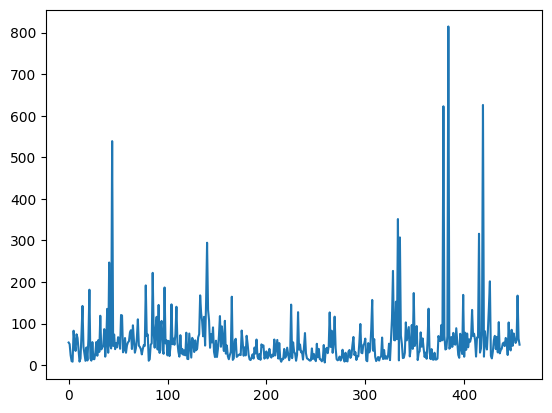

In [ ]:
train_df['Overall Rating'].plot()

<Axes: >

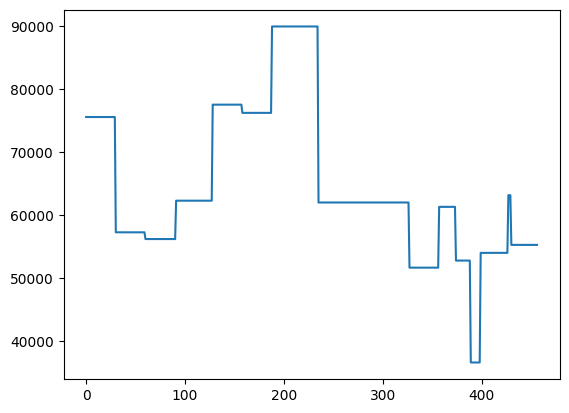

In [ ]:
train_df['Income'].plot()

In [ ]:
train_df.dtypes

Unnamed: 0          int64
Name               object
Type               object
Overall Rating    float64
Zip Code            int64
TotalPop            int64
Hispanic          float64
White             float64
Black             float64
Native            float64
Asian             float64
Pacific           float64
Income              int64
IncomePerCap        int64
Employed            int64
PrivateWork       float64
PublicWork        float64
SelfEmployed      float64
FamilyWork        float64
Unemployment      float64
dtype: object

In [ ]:
test_df.dtypes

Unnamed: 0        int64
Name             object
Zip Code          int64
Type             object
TotalPop          int64
Hispanic        float64
White           float64
Black           float64
Native          float64
Asian           float64
Pacific         float64
Income            int64
IncomePerCap      int64
Employed          int64
PrivateWork     float64
PublicWork      float64
SelfEmployed    float64
FamilyWork      float64
Unemployment    float64
dtype: object

In [ ]:
train_df=train_df.drop('Unnamed: 0',axis=1)

In [ ]:
test_df=test_df.drop('Unnamed: 0',axis=1)

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

<ipython-input-7-6a0381f0d039>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(train_df['Overall Rating'] , fit=norm, ax=ax1)


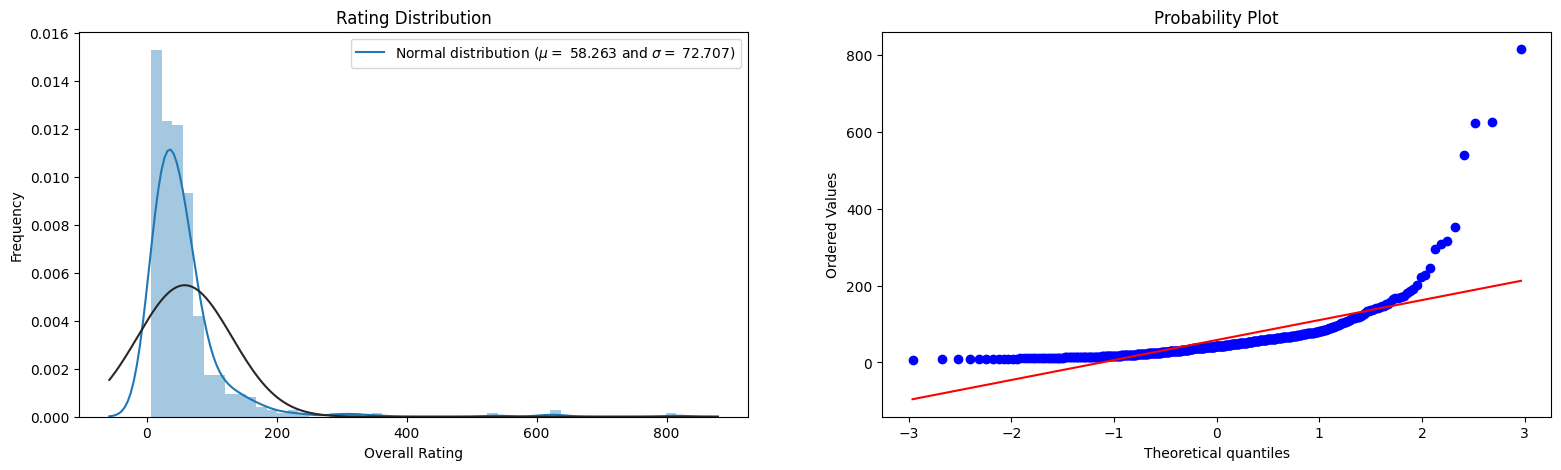

In [ ]:
(mu, sigma) = norm.fit(train_df['Overall Rating'])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(train_df['Overall Rating'] , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Rating Distribution')
ax2 = stats.probplot(train_df['Overall Rating'], plot=plt)
f.show();

In [ ]:
train_df['Overall Rating'].describe()

count    457.000000
mean      58.263457
std       72.786357
min        6.400000
25%       22.600000
50%       42.000000
75%       65.400000
max      814.600000
Name: Overall Rating, dtype: float64

<ipython-input-15-553157a87aa8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train_df['Overall Rating']),ax=ax[0]).set_title("Logarithmic distribution plot for Rating")
<ipython-input-15-553157a87aa8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(train_df['Overall Rating'])

Text(0.5, 1.0, 'Square distribution plot for Rating')

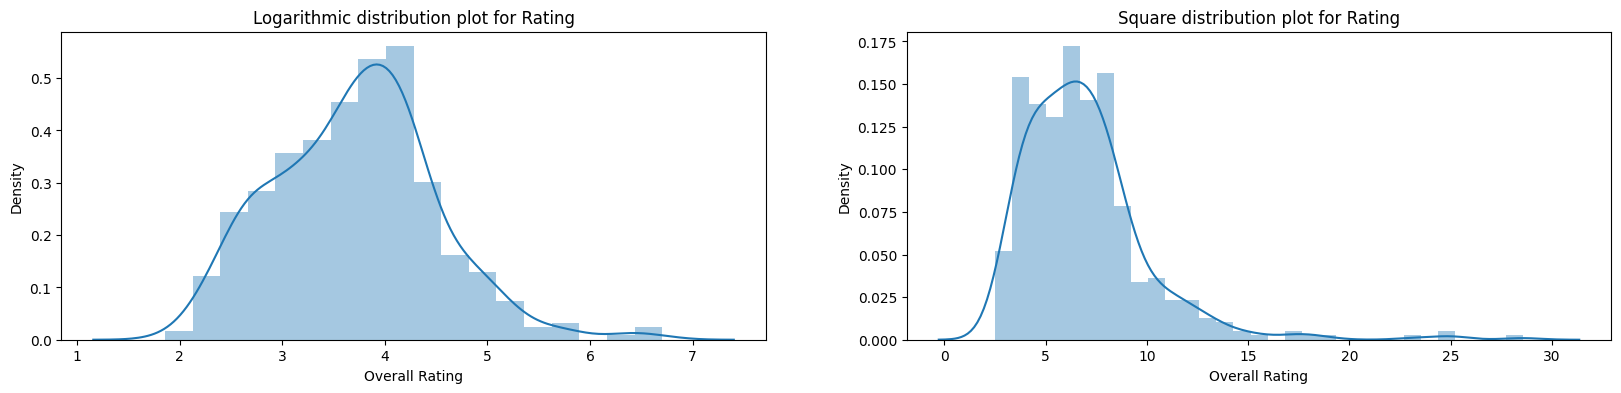

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

sns.distplot(np.log(train_df['Overall Rating']),ax=ax[0]).set_title("Logarithmic distribution plot for Rating")

sns.distplot(np.sqrt(train_df['Overall Rating']),ax=ax[1]).set_title("Square distribution plot for Rating")

Training set :
American               196
Italian                120
Chinese                 14
Asian                   13
Mexican                 11
Mediterranean           11
Bar                      8
Pizza                    8
Seafood                  8
Latin                    6
Indian                   6
German                   4
Caribbean                4
French                   3
Japanese                 3
Irish                    3
International            3
Barbecue                 2
Greek                    2
Peruvian                 2
Spanish                  2
Moroccan                 2
Bakeries                 2
Sushi                    2
Steakhouse               2
Cafe                     2
Polish                   2
Quick Bites              1
Middle Eastern           1
European                 1
Australian               1
Dessert                  1
Grill                    1
Contemporary             1
Brew Pub                 1
Vegetarian Friendly      1
Fusion       

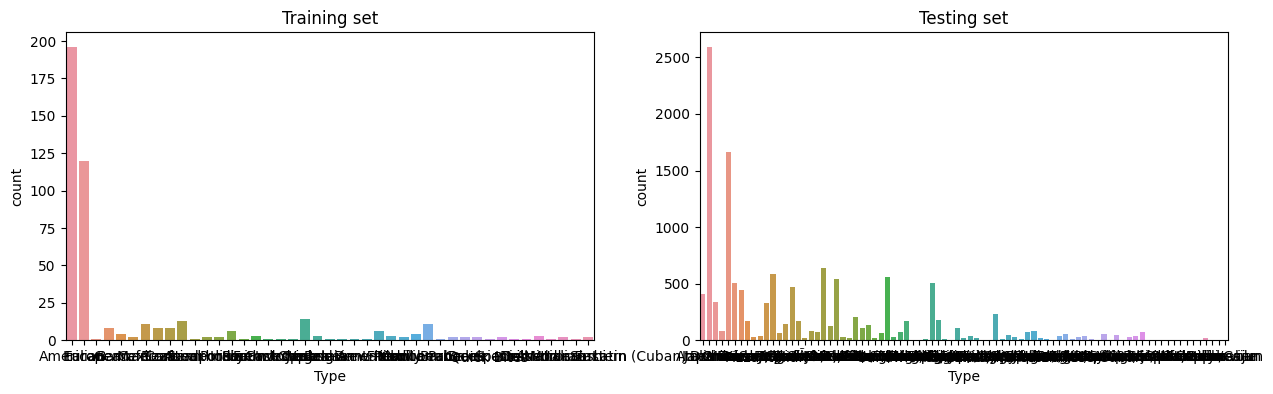

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x=train_df['Type'],ax=ax[0]).set_title("Training set")
print("Training set :")
print(train_df['Type'].value_counts())

sns.countplot(x=test_df['Type'],ax=ax[1]).set_title("Testing set")
print("-------------")
print("Testing set :")
print(test_df['Type'].value_counts())

American Food is the most considered when opening restaurant chain.

Training set :
14850    30
12866    29
12601    26
10601    19
12305    15
         ..
11211     1
11206     1
11215     1
11229     1
14610     1
Name: Zip Code, Length: 119, dtype: int64
-------------
Testing set :
11354    366
11211    359
11201    337
11215    322
11220    306
        ... 
11242      1
11352      1
11451      1
11256      1
11241      1
Name: Zip Code, Length: 144, dtype: int64


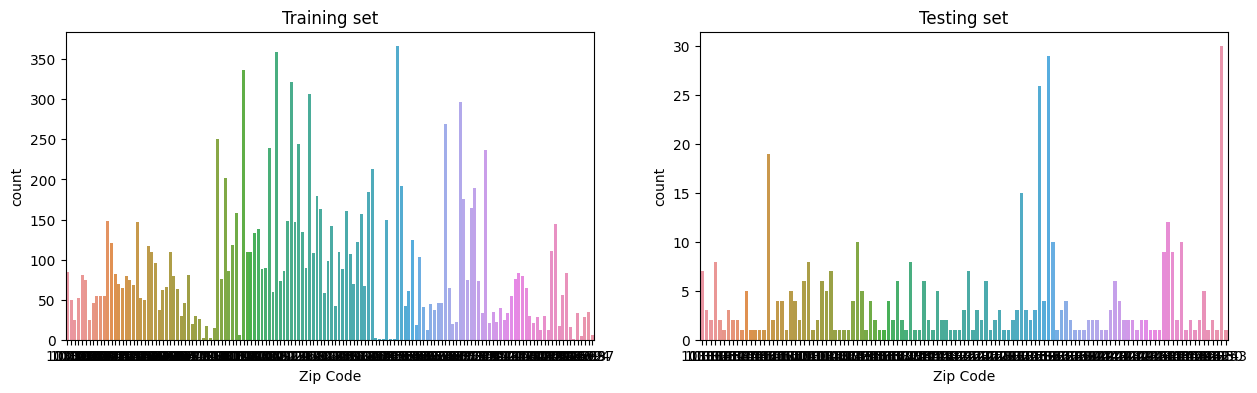

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x=test_df['Zip Code'],ax=ax[0]).set_title("Training set")
print("Training set :")
print(train_df['Zip Code'].value_counts())

sns.countplot(x=train_df['Zip Code'],ax=ax[1]).set_title("Testing set")
print("-------------")
print("Testing set :")
print(test_df['Zip Code'].value_counts())

[Text(0.5, 1.0, 'Violinplot for Type vs Revenue')]

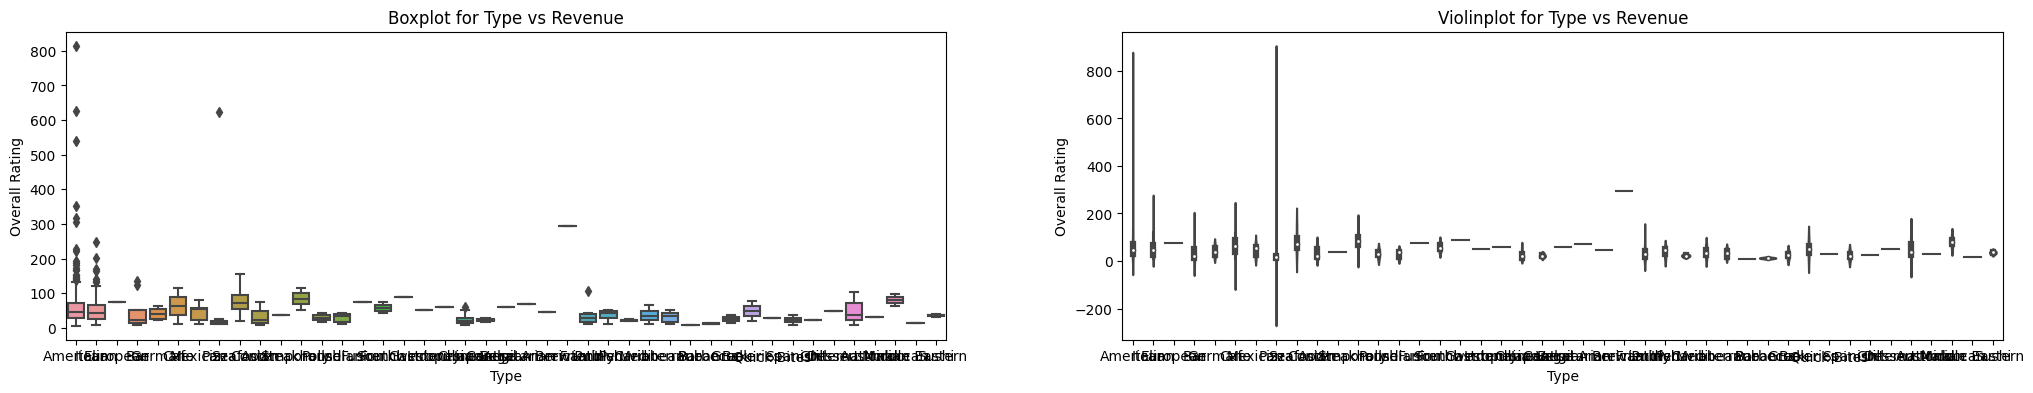

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,4))    
sns.boxplot(y=train_df['Overall Rating'],x=train_df['Type'],ax=ax[0]).set(title='Boxplot for Type vs Revenue')
sns.violinplot(y=train_df['Overall Rating'],x=train_df['Type'],ax=ax[1]).set(title='Violinplot for Type vs Revenue')

[Text(0.5, 1.0, 'Zip Code vs Rating')]

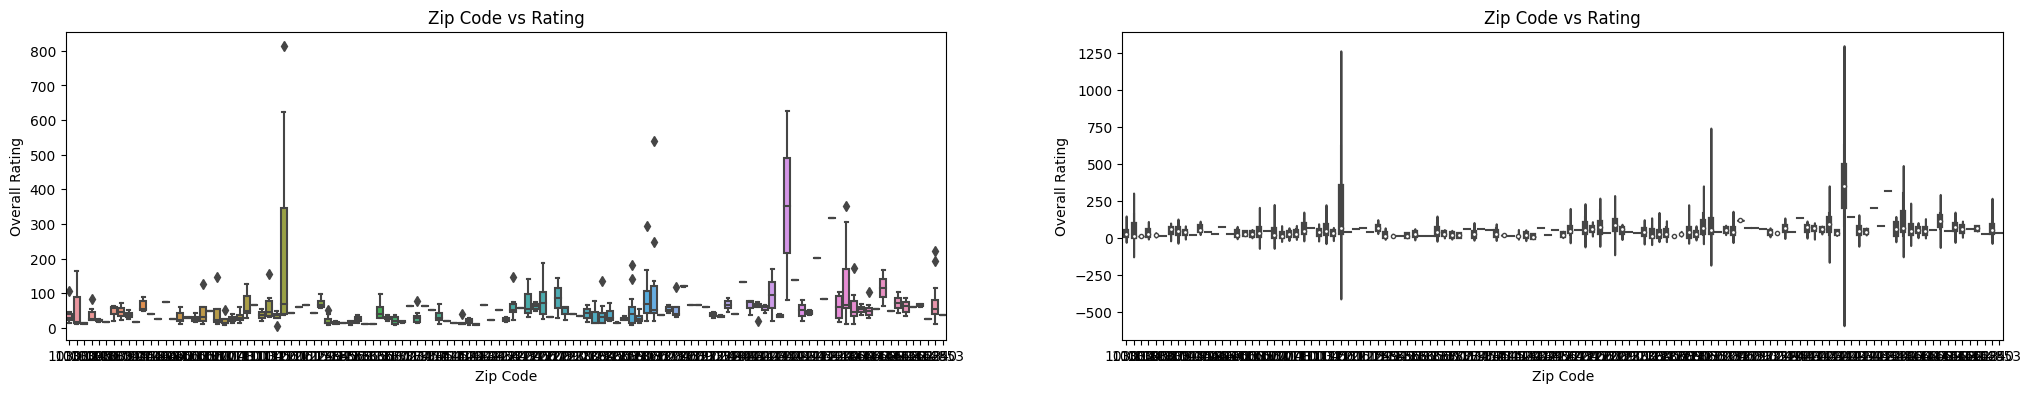

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,4))    
sns.boxplot(y=train_df['Overall Rating'],x=train_df['Zip Code'],ax=ax[0]).set(title='Zip Code vs Rating')
sns.violinplot(y=train_df['Overall Rating'],x=train_df['Zip Code'],ax=ax[1]).set(title='Zip Code vs Rating')

In [ ]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_df.columns

Index(['Name', 'Type', 'Overall Rating', 'Zip Code', 'TotalPop', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income',
       'IncomePerCap', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [ ]:
train_df = train_df[['Name', 'Type', 'Zip Code', 'TotalPop', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income',
       'IncomePerCap', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment', 'Overall Rating']]

In [ ]:
test_df = test_df[['Name', 'Type', 'Zip Code', 'TotalPop', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income',
       'IncomePerCap', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment']]

interval columns not set, guessing: ['Zip Code', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income', 'IncomePerCap', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'Overall Rating']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable Pacific for analysis 1. Dropping this column
  warnings.warn(


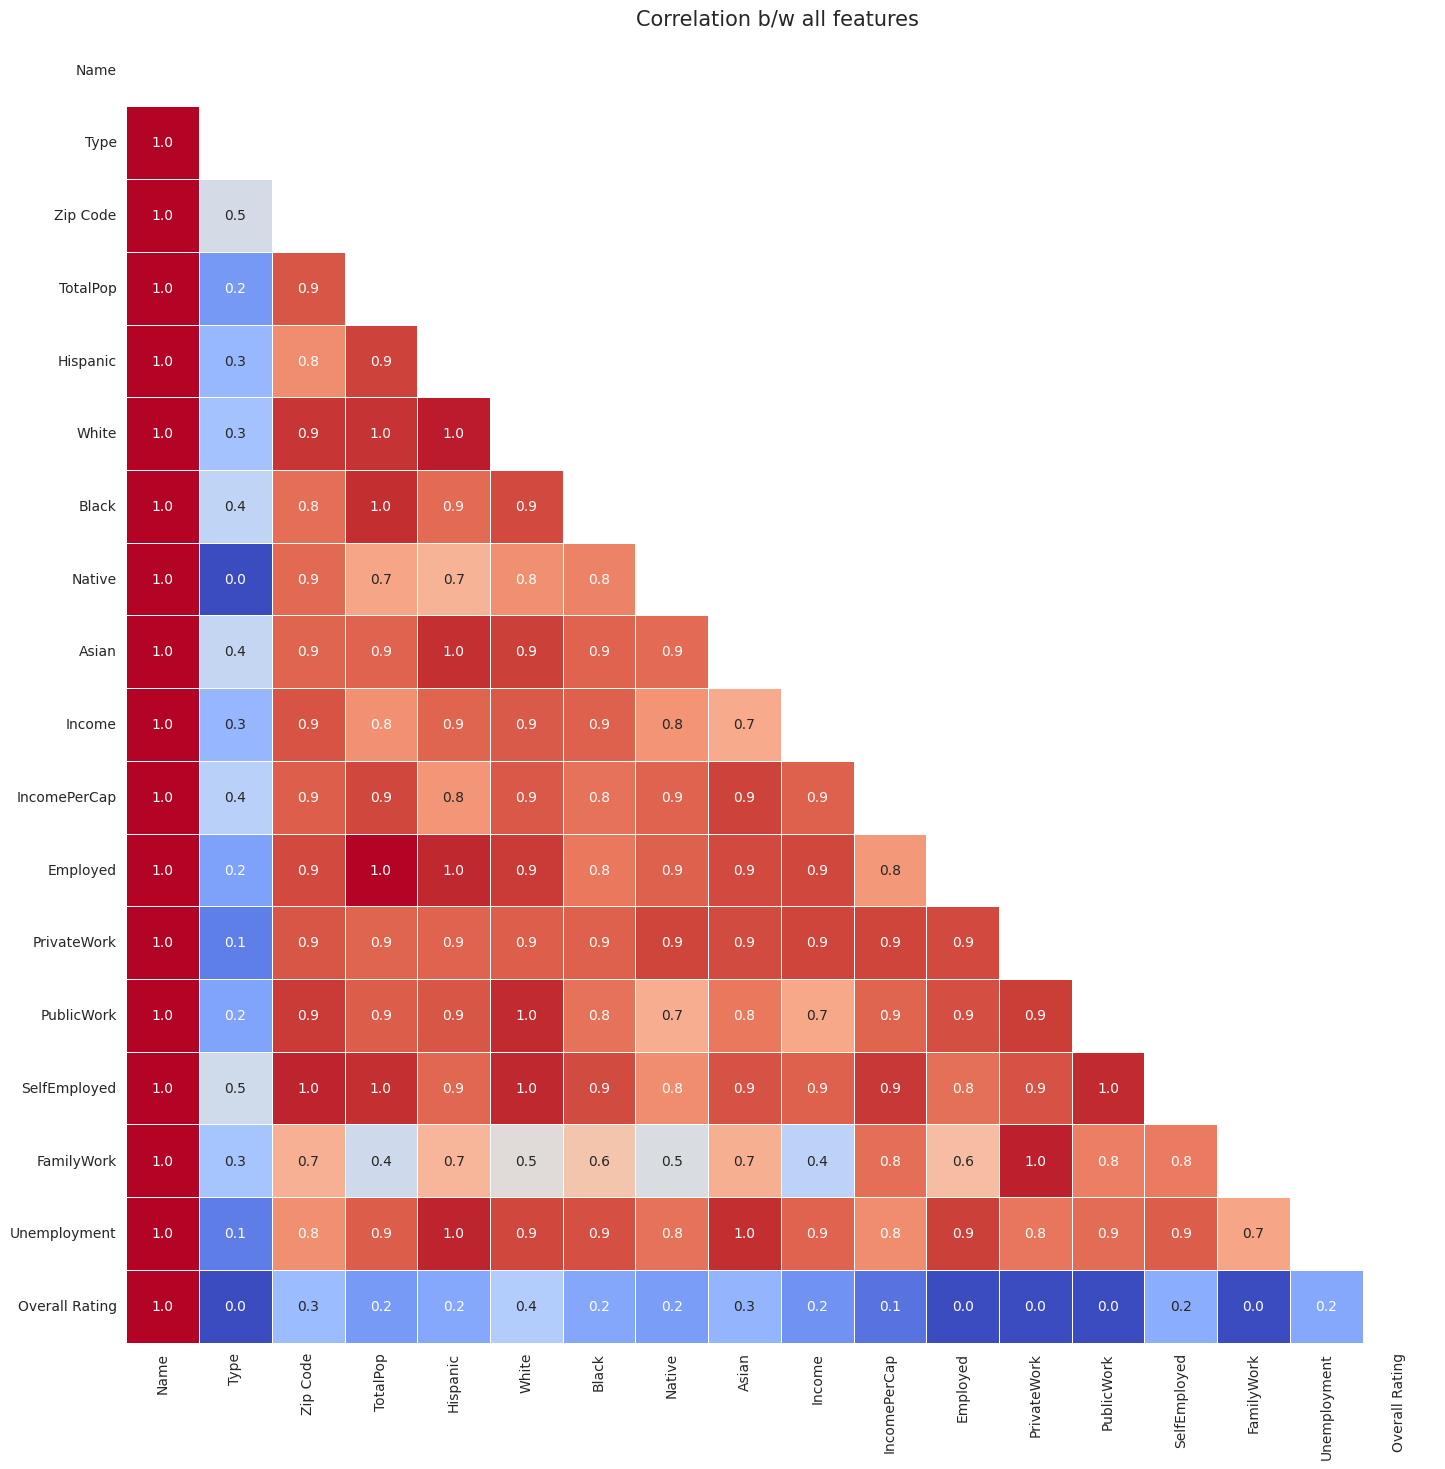

In [ ]:
import phik

Phi_corr = train_df.phik_matrix()

mask = np.zeros_like(Phi_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  fig, ax = plt.subplots(figsize=(20,17))         # Sample figsize in inches
  plot = sns.heatmap(Phi_corr, mask=mask, annot=True, fmt='.1f',linewidths=.5, ax=ax,cmap='coolwarm',robust=True, square=True,cbar=False) #annot=True writes data in rect boxes
  plt.title('Correlation b/w all features ',size = 15)
  plt.show()

From the above correlation matrix it is clear that most of the numerical features are having less or no correlation with Rating variable. 
Most of the numerical features within columns are highly correlated with each other. It means a small change in one feature impacts changes in another feature.

In [ ]:
print('\033[1m' + "Below are the top 10 correlated features to 'Rating' variable" + '\033[0m')
print(Phi_corr['Overall Rating'].sort_values(ascending=False)[0:10])

Below are the top 10 correlated features to 'Rating' variable
Name              1.000000
Overall Rating    1.000000
White             0.358473
Zip Code          0.291596
Asian             0.266242
SelfEmployed      0.244360
Hispanic          0.230380
Unemployment      0.229569
Black             0.223407
Native            0.198536
Name: Overall Rating, dtype: float64


In [ ]:
train_df['Overall Rating'] = np.log1p(train_df['Overall Rating'])


<ipython-input-17-d6d4edf97f6d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train_df['Overall Rating'])


Text(0.5, 1.0, 'Distribution plot for Rating')

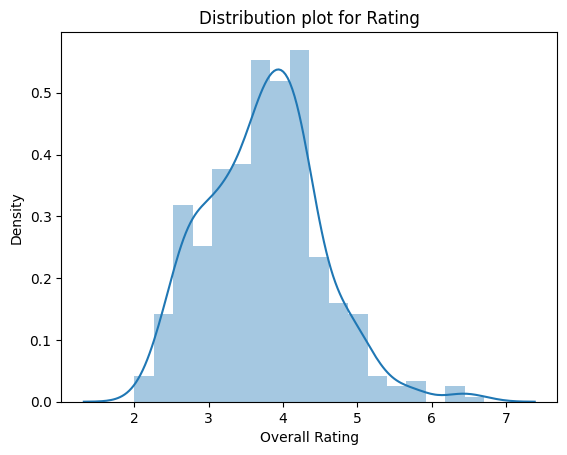

In [ ]:
ax = sns.distplot(train_df['Overall Rating'])
ax.set_title("Distribution plot for Rating") 

In [ ]:
y_train = train_df['Overall Rating']

In [ ]:
X, y = train_df.drop('Overall Rating', axis=1), train_df['Overall Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=118)
corr = train_df.corr()

<ipython-input-19-863582c3eeea>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


In [ ]:
train_df.columns

Index(['Name', 'Type', 'Zip Code', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'IncomePerCap', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment', 'Overall Rating'],
      dtype='object')

Dropping Columns with Zero Correlation

In [ ]:

X_train = X_train.drop('Pacific',axis=1)
X_test = X_test.drop('Pacific',axis=1)

In [ ]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))  #numerical features that are highly correlated with each other
corr_col = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

Phi_corrFea = (Phi_corr['Overall Rating'].sort_values(ascending=False)==0) #Features that have zero or no correlation with target variable
no_cor = [col for col in X_train.columns if Phi_corrFea[col]==True]

drop_num = [col for col in corr_col if col not in no_cor]  #Dropping Features that are having zero correlation with the target variable but are highly correlated with other variables  
drop_num

<ipython-input-22-41d6037d5e98>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))  #numerical features that are highly correlated with each other


['Asian', 'IncomePerCap', 'Unemployment']

In [ ]:
X_train = X_train.drop(drop_num,axis=1)
X_test = X_test.drop(drop_num,axis=1)
X_train.head(1)

,Name,Type,Zip Code,TotalPop,Hispanic,White,Black,Native,Income,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork
332,Bakery Restaurant and Lounge,American,14303,212675,2.7,86.0,7.1,1.0,51656,100990,81.8,14.2,3.9,0.1


In [ ]:
def catFea(df):
  labelEncoding = preprocessing.LabelEncoder()
  df['Name_id'] = labelEncoding.fit_transform(df['Name'].astype('str'))
  df['Type_id'] = labelEncoding.fit_transform(df['Type'].astype('str'))
  return df

In [ ]:
X_train = catFea(X_train)
X_test = catFea(X_test)
X_train.head(10)

,Name,Type,Zip Code,TotalPop,Hispanic,White,Black,Native,Income,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Name_id,Type_id
332,Bakery Restaurant and Lounge,American,14303,212675,2.7,86.0,7.1,1.0,51656,100990,81.8,14.2,3.9,0.1,33,0
177,Nino's,Italian,10305,475948,18.2,62.1,9.4,0.1,76244,212253,74.6,21.0,4.3,0.1,217,23
368,Slick's Restaurant,American,12305,155239,6.7,73.8,9.6,0.2,61315,73044,76.5,19.2,4.3,0.0,276,0
88,AGAVA Restaurant,Southwestern,14850,104415,4.8,77.3,3.6,0.2,56200,50390,78.8,13.5,7.4,0.2,8,36
346,Chill 443,American,14301,212675,2.7,86.0,7.1,1.0,51656,100990,81.8,14.2,3.9,0.1,67,0
149,Mama Mia's Restaurant,Italian,12866,226632,3.0,90.9,1.5,0.2,77548,117053,77.4,17.4,5.1,0.1,190,23
193,Lefteris Gyro,Mediterranean,10710,975321,24.0,54.4,13.5,0.1,89968,479696,79.6,13.8,6.5,0.1,170,26
90,Taverna Banfi,Italian,14853,104415,4.8,77.3,3.6,0.2,56200,50390,78.8,13.5,7.4,0.2,302,23
272,Dumpling Galaxy,Chinese,11355,2339280,28.0,25.4,17.2,0.2,62008,1142363,80.1,13.7,6.1,0.1,94,11
163,Pier 76,Italian,10301,475948,18.2,62.1,9.4,0.1,76244,212253,74.6,21.0,4.3,0.1,238,23


In [ ]:
Id_df=X_train[['Name','Type','Name_id','Type_id']]

In [ ]:
id_df_test=X_test[['Name','Type','Name_id','Type_id']]

In [ ]:
X_train['Name']=X_train['Name_id']
X_train=X_train.drop('Name_id',axis=1)

In [ ]:
X_test['Name']=X_test['Name_id']
X_test=X_test.drop('Name_id',axis=1)

In [ ]:
X_train['Type']=X_train['Type_id']
X_train=X_train.drop('Type_id',axis=1)

In [ ]:
X_test['Type']=X_test['Type_id']
X_test=X_test.drop('Type_id',axis=1)

In [ ]:
Id_df.head()

,Name,Type,Name_id,Type_id
332,Bakery Restaurant and Lounge,American,33,0
177,Nino's,Italian,217,23
368,Slick's Restaurant,American,276,0
88,AGAVA Restaurant,Southwestern,8,36
346,Chill 443,American,67,0


In [ ]:
id_df_test.head()

,Name,Type,Name_id,Type_id
372,The Appian Way,Italian,71,11
202,Lazy Boy Saloon,American,42,0
94,Jack's Oyster House,American,37,0
62,Maxie's Supper Club and Oyster Bar,American,51,0
64,Carriage House Cafe,American,16,0


In [ ]:
X_train.head(1)

,Name,Type,Zip Code,TotalPop,Hispanic,White,Black,Native,Income,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork
332,33,0,14303,212675,2.7,86.0,7.1,1.0,51656,100990,81.8,14.2,3.9,0.1


In [ ]:
print(X_train.shape,' ',X_test.shape)

(365, 14)   (92, 14)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso




In [ ]:
params_ridge = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_model = Ridge()
ridge_regressor = GridSearchCV(ridge_model, params_ridge, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
ridge_regressor.fit(X_train, y_train)
print(f'Optimal alpha: {ridge_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {ridge_regressor.best_params_["fit_intercept"]}')
print(f'Optimal solver: {ridge_regressor.best_params_["solver"]}')
print(f'Best score: {ridge_regressor.best_score_}')

Optimal alpha: 20.00
Optimal fit_intercept: False
Optimal solver: cholesky
Best score: -0.6995080116852336


In [ ]:
ridge_model = Ridge(alpha=ridge_regressor.best_params_["alpha"], fit_intercept=ridge_regressor.best_params_["fit_intercept"], 
                     solver=ridge_regressor.best_params_["solver"])
ridge_model.fit(X_train, y_train)
y_train_pred = ridge_model.predict(X_train)
y_pred = ridge_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -2.2816561126949493
Test r2 score:  0.17499350539820713
Train RMSE: 0.6658
Test RMSE: 0.7306


In [ ]:
from sklearn.linear_model import Lasso
params_lasso = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
}

lasso_model = Lasso()
lasso_regressor = GridSearchCV(lasso_model, params_lasso, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
lasso_regressor.fit(X_train, y_train)
print(f'Optimal alpha: {lasso_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {lasso_regressor.best_params_["fit_intercept"]}')
print(f'Best score: {lasso_regressor.best_score_}')

Optimal alpha: 0.50
Optimal fit_intercept: True
Best score: -0.690777432530639


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.645e+01, tolerance: 2.117e-02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lasso_model = Lasso(alpha=lasso_regressor.best_params_["alpha"], fit_intercept=lasso_regressor.best_params_["fit_intercept"])
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_pred = lasso_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -3.7147423157445347
Test r2 score:  0.16886718514649957
Train RMSE: 0.6761
Test RMSE: 0.7333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.645e+01, tolerance: 2.117e-02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

# Use ElasticNetCV to tune alpha automatically instead of redundantly using ElasticNet and GridSearchCV
el_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=5e-2, cv=10, n_jobs=-1)         
el_model.fit(X_train, y_train)
print(f'Optimal alpha: {el_model.alpha_:.6f}')
print(f'Optimal l1_ratio: {el_model.l1_ratio_:.3f}')
print(f'Number of iterations {el_model.n_iter_}')

Optimal alpha: 63300.930537
Optimal l1_ratio: 0.100
Number of iterations 2


In [ ]:
y_train_pred = el_model.predict(X_train)
y_pred = el_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -26.154028108713668
Test r2 score:  0.04655443314662522
Train RMSE: 0.7465
Test RMSE: 0.7854


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

params_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11],
}

knn_model = KNeighborsRegressor()
knn_regressor = GridSearchCV(knn_model, params_knn, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
knn_regressor.fit(X_train, y_train)
print(f'Optimal neighbors: {knn_regressor.best_params_["n_neighbors"]}')
print(f'Best score: {knn_regressor.best_score_}')

Optimal neighbors: 11
Best score: -0.6840110871729137


In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=knn_regressor.best_params_["n_neighbors"])
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_pred = knn_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -1.0098203694367966
Test r2 score:  0.1867515356791083
Train RMSE: 0.6240
Test RMSE: 0.7254


In [ ]:
from sklearn.ensemble import RandomForestRegressor

params_rf = {
    'max_depth': [10, 30, 35, 50, 65, 75, 100],
    'max_features': [.3, .4, .5, .6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30, 50, 100, 200]
}

rf = RandomForestRegressor()
rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
rf_regressor.fit(X_train, y_train)
print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
print(f'Best score: {rf_regressor.best_score_}')

In [ ]:
rf_model = RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"], 
                                 max_features=rf_regressor.best_params_["max_features"], 
                                 min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"], 
                                 min_samples_split=rf_regressor.best_params_["min_samples_split"], 
                                 n_estimators=rf_regressor.best_params_["n_estimators"], 
                                 n_jobs=-1, oob_score=True)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -1.108781937568379
Test r2 score:  0.18016169687989414
Train RMSE: 0.5898
Test RMSE: 0.7283


In [ ]:
import lightgbm as lgbm

params_lgbm = {
    'learning_rate': [.01, .1, .5, .7, .9, .95, .99, 1],
    'boosting': ['gbdt'],
    'metric': ['l1'],
    'feature_fraction': [.3, .4, .5, 1],
    'num_leaves': [20],
    'min_data': [10],
    'max_depth': [10],
    'n_estimators': [10, 30, 50, 100]
}

lgb = lgbm.LGBMRegressor()
lgb_regressor = GridSearchCV(lgb, params_lgbm, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
lgb_regressor.fit(X_train, y_train)
print(f'Optimal lr: {lgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal feature_fraction: {lgb_regressor.best_params_["feature_fraction"]}')
print(f'Optimal n_estimators: {lgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {lgb_regressor.best_score_}')

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
Optimal lr: 0.1
Optimal feature_fraction: 0.5
Optimal n_estimators: 10
Best score: -0.68999581653765


In [ ]:
lgb_model = lgbm.LGBMRegressor(learning_rate=lgb_regressor.best_params_["learning_rate"], boosting='gbdt', 
                               metric='l1', feature_fraction=lgb_regressor.best_params_["feature_fraction"], 
                               num_leaves=20, min_data=10, max_depth=10, 
                               n_estimators=lgb_regressor.best_params_["n_estimators"], n_jobs=-1)
lgb_model.fit(X_train, y_train)
y_train_pred = lgb_model.predict(X_train)
y_pred = lgb_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -3.984623741893609
Test r2 score:  0.17425700042914904
Train RMSE: 0.6187
Test RMSE: 0.7309


In [ ]:
params_xgb = {
    'learning_rate': [.1, .5, .7, .9, .95, .99, 1],
    'colsample_bytree': [.3, .4, .5, .6],
    'max_depth': [4],
    'alpha': [3],
    'subsample': [.5],
    'n_estimators': [30, 70, 100, 200]
}

xgb_model = XGBRegressor()
xgb_regressor = GridSearchCV(xgb_model, params_xgb, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
xgb_regressor.fit(X_train, y_train)
print(f'Optimal lr: {xgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal colsample_bytree: {xgb_regressor.best_params_["colsample_bytree"]}')
print(f'Optimal n_estimators: {xgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {xgb_regressor.best_score_}')

Optimal lr: 0.1
Optimal colsample_bytree: 0.3
Optimal n_estimators: 70
Best score: -0.678991222595187


In [ ]:
xgb_model = XGBRegressor(learning_rate=xgb_regressor.best_params_["learning_rate"], 
                         colsample_bytree=xgb_regressor.best_params_["colsample_bytree"], 
                         max_depth=4, alpha=3, subsample=.5, 
                         n_estimators=xgb_regressor.best_params_["n_estimators"], n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_train_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -1.9314487343733213
Test r2 score:  0.1880958201784495
Train RMSE: 0.6204
Test RMSE: 0.7248


In [ ]:
# XGB with early stopping
xgb_model.fit(X_train, y_train, early_stopping_rounds=4,
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -3.3508356161238186
Test r2 score:  0.18995106106309634
Train RMSE: 0.6532
Test RMSE: 0.7239


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [ ]:
rf_model_en = RandomForestRegressor(max_depth=200, max_features=0.4, min_samples_leaf=3, 
                                 min_samples_split=6, n_estimators=30, n_jobs=-1, oob_score=True)
rf_model_en.fit(X_train, y_train)
y_train_pred = rf_model_en.predict(X_train)
y_pred = rf_model_en.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -0.3507590207181539
Test r2 score:  0.15840792776296486
Train RMSE: 0.5255
Test RMSE: 0.7379


Rf -0.549 0.067
XGB -0.536 0.066
LGB -0.543 0.066
El -0.591 0.068
KNN -0.539 0.058
Lasso -0.541 0.063
Ridge -0.546 0.063
stacking -0.532 0.060


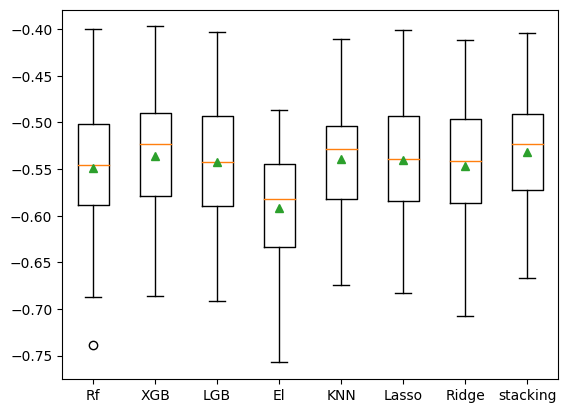

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    base_models = list()
    base_models.append(('KNN', knn_model))
    base_models.append(('XGB Model', xgb_model))
    base_models.append(('Lasso', lasso_model))
    # define meta learner model
    learner = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=base_models, final_estimator=learner, cv=10)
    return model
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['Rf'] = rf_model_en
    models['XGB'] = xgb_model
    models['LGB'] = lgb_model
    models['El'] = el_model
    models['KNN'] = knn_model
    models['Lasso'] = lasso_model
    models['Ridge'] = ridge_model
    models['stacking'] = get_stacking()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=19)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print(f'{name} {mean(scores):.3f} {std(scores):.3f}')
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
test_df=test_df.drop(drop_num,axis=1)

KeyError: ignored

In [ ]:
test_df=test_df.drop('Pacific',axis=1)

In [ ]:
#test_df=catFea(test_df)
test_df.head(1)

,Name,Type,Zip Code,TotalPop,Hispanic,White,Black,Native,Income,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork
0,VITE BAR,Italian,11106,2339280,28.0,25.4,17.2,0.2,62008,1142363,80.1,13.7,6.1,0.1


In [ ]:
test_df_merge=test_df.merge(id_df_test[['Type','Type_id']],on='Type')

In [ ]:
test_df=test_df_merge


In [ ]:
test_df.drop_duplicates(subset='Name')

,Name,Type,Zip Code,TotalPop,Hispanic,White,Black,Native,Income,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Type_id
0,VITE BAR,Italian,11106,2339280,28.0,25.4,17.2,0.2,62008,1142363,80.1,13.7,6.1,0.1,11
33,PORTALIA RISTORANTE BAR AND LOUNGE,Italian,11106,2339280,28.0,25.4,17.2,0.2,62008,1142363,80.1,13.7,6.1,0.1,11
66,PS PIZZA SHOP,Italian,11106,2339280,28.0,25.4,17.2,0.2,62008,1142363,80.1,13.7,6.1,0.1,11
99,Vite-Vinosteria,Italian,11106,2339280,28.0,25.4,17.2,0.2,62008,1142363,80.1,13.7,6.1,0.1,11
132,IL BAMBINO,Italian,11106,2339280,28.0,25.4,17.2,0.2,62008,1142363,80.1,13.7,6.1,0.1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112972,SELAMAT PAGI,Indonesian,11222,2635121,19.3,36.0,30.6,0.1,52782,1217976,79.4,13.9,6.6,0.1,9
112973,SKY CAFE,Indonesian,11373,2339280,28.0,25.4,17.2,0.2,62008,1142363,80.1,13.7,6.1,0.1,9
112974,AWANG KITCHEN,Indonesian,11373,2339280,28.0,25.4,17.2,0.2,62008,1142363,80.1,13.7,6.1,0.1,9
112975,UPI JAYA RESTAURANT INC,Indonesian,11373,2339280,28.0,25.4,17.2,0.2,62008,1142363,80.1,13.7,6.1,0.1,9


In [ ]:
labelEncoding = preprocessing.LabelEncoder()
test_df['Name'] = labelEncoding.fit_transform(test_df['Name'].astype('str'))

In [ ]:
test_df['Type']=test_df['Type_id']
test_df=test_df.drop('Type_id',axis=1)

In [ ]:
stack_model=get_stacking()



In [ ]:
base_models = list()
base_models.append(('KNN', knn_model))
base_models.append(('XGB Model', xgb_model))
base_models.append(('Lasso', lasso_model))
# define meta learner model
learner = LinearRegression()
# define the stacking ensemble
stack1 = StackingRegressor(estimators=base_models, final_estimator=learner, cv=10)
# fit the model on all available data
stack1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.645e+01, tolerance: 2.117e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.278e+01, tolerance: 1.761e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.412e+01, tolerance: 1.903e

StackingRegressor(cv=10,
                  estimators=[('KNN', KNeighborsRegressor(n_neighbors=11)),
                              ('XGB Model',
                               XGBRegressor(alpha=3, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.3,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=70, n_jobs=-1,
                                            num_parallel_tree=None,
                                            predictor=None, ...)),
                              ('Lasso', Lasso(alpha=0.5))],
                  final_estimator=LinearRegression())

In [ ]:
submission = pd.DataFrame(columns=['Type','Zip Code','Prediction'])
submission['Type'] = test_df['Type']
submission['Zip Code'] = test_df['Zip Code']
xg_pred = stack1.predict(test_df)
submission['Prediction'] = np.expm1(xg_pred)

In [ ]:
submission.head(1)

,Type,Zip Code,Prediction
0,11,11106,19.59425


In [ ]:
final_submission_df = pd.merge(submission, id_df_test[['Type', 'Type_id']], left_on='Type',right_on='Type_id', how='left')

In [ ]:
final_submission_df.isnull().sum()

Type_x        0
Zip Code      0
Prediction    0
Type_y        0
Type_id       0
dtype: int64

In [ ]:
final_submission_df=final_submission_df.drop('Type_x',axis=1)

In [ ]:
final_submission_df=final_submission_df.drop('Type_id',axis=1)

In [ ]:
final_submission_df.nunique()

Zip Code       142
Prediction    7281
Type_y          15
dtype: int64

In [ ]:
final_submission_unique=final_submission_df.drop_duplicates(subset=['Zip Code','Prediction','Type_y'])

In [ ]:
final_submission_unique.nunique()

Zip Code       142
Prediction    7281
Type_y          15
dtype: int64

We successfully removed duplicates without removing the unique valies

In [ ]:
final_submission_unique.to_csv('submission_ridge.csv',index=False)

In [ ]:
mean_subm=final_submission_unique.groupby(['Zip Code', 'Type_y'])['Prediction'].agg('mean')

Suppose we want to open a new restaurant in Astoria,NY . We can check the best suitable cuisine for the area by the below code:-

In [ ]:
mean_subm_df = mean_subm.reset_index(name='Mean Prediction')

In [ ]:
mean_subm_df.head()

,Zip Code,Type_y,Mean Prediction
0,10301,American,22.962719
1,10301,Asian,25.754824
2,10301,Caribbean,23.716393
3,10301,Chinese,23.353733
4,10301,Italian,22.818279


In [ ]:
mean_subm_df.loc[mean_subm_df['Zip Code'] == 11102].sort_values('Mean Prediction', ascending=False)

,Zip Code,Type_y,Mean Prediction
270,11102,Mexican,31.088916
272,11102,Pizza,29.130207
271,11102,Peruvian,27.815509
273,11102,Seafood,27.688666
268,11102,Italian,25.409008
264,11102,American,25.324584
267,11102,Greek,24.835766
266,11102,Chinese,23.229233
265,11102,Asian,22.559872
269,11102,Mediterranean,22.539096


Hence Mexican food is most preferred in the area and would be the best cuisine for opening a new restaurant.

Now lets check which locality is best if we want to open an 'Asian' Cuisine Restaurant.

In [ ]:
mean_subm_df.loc[mean_subm_df['Type_y'] == 'Asian'].sort_values('Mean Prediction', ascending=False)

,Zip Code,Type_y,Mean Prediction
967,11693,Asian,73.968551
595,11235,Asian,73.437484
569,11232,Asian,73.306656
446,11217,Asian,69.828123
468,11219,Asian,67.401371
...,...,...,...
55,10308,Asian,21.467495
40,10306,Asian,20.106829
654,11356,Asian,19.981776
885,11421,Asian,19.907239


Zip Code : 11693 , i.e: Far Rockaway, NY would be the best suited location to open an Asian Restaurant.